In [ ]:
2023/12
## skku DataMining project : 
## 서울 대중교통 혼잡도 및 중심성 그래프분석(Seoul_transportation_GraphMining)
contributer : 김민, 김효원, 이수정, 조병웅  
instruction :   
블로거 GD park manger님의 대중교통 분석 연구를 바탕으로, 서울시 대중교통 네트워크의 중심성을 살펴보고,
사용목적 대비 유동인구 수라는 혼잡도 개념을 추가하여 새로 발전된 인사이트를 제공함을 목적으로 함.
참고한 분석 연구의 주소 -> https://m.blog.naver.com/gdpresent/221147909255

## 파일 정보
contributer : 김민
완성된 그래프를 바탕으로 혼잡도, 중심성 분석 및 시각화하는 코드

## 라이브러리 및 데이터 로딩

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nodes = pd.read_csv('../데이터/전처리3_생성데이터/final_node.csv', encoding='cp949')
nodes

,title,ARS_ID,name,X,Y,type,행정동,구
0,1_4.19민주묘지역,1,4.19민주묘지역,37.649527,127.013689,subway,우이동,강북구
1,2_가능역,2,가능역,37.748393,127.044275,subway,가능동,의정부시
2,3_가락시장역,3,가락시장역,37.493092,127.118258,subway,가락동,송파구
3,4_가산디지털단지역,4,가산디지털단지역,37.480389,126.882644,subway,가산동,금천구
4,5_가양역,5,가양역,37.561429,126.854402,subway,등촌동,강서구
...,...,...,...,...,...,...,...,...
3257,68233_장냇말,68233,장냇말,37.726196,126.976828,bus,장흥면,양주시
3258,68234_장골부대앞,68234,장골부대앞,37.731134,126.977772,bus,장흥면,양주시
3259,68235_부곡1리마을회관,68235,부곡1리마을회관,37.736108,126.977397,bus,장흥면,양주시
3260,68236_송추초등학교.송추검문소,68236,송추초등학교.송추검문소,37.716477,126.971601,bus,장흥면,양주시


In [ ]:
nodes.loc[nodes['name'].str.contains('잠실')]

,title,ARS_ID,name,X,Y,type,행정동,구
290,291_잠실나루역,291,잠실나루역,37.520694,127.103800,subway,신천동,송파구
291,292_잠실새내역,292,잠실새내역,37.511608,127.086301,subway,잠실동,송파구
292,293_잠실역,293,잠실역,37.513309,127.100215,subway,신천동,송파구


In [ ]:
edges = pd.read_csv('final_edge.csv', encoding='cp949')
edges

,LaneNo,source,target,type,weight
0,1,90_덕정역,89_덕계역,subway,0.002701
1,1,63_남영역,272_용산역,subway,0.072168
2,1,272_용산역,68_노량진역,subway,0.053546
3,1,68_노량진역,84_대방역,subway,0.024140
4,1,84_대방역,210_신길역,subway,0.039876
...,...,...,...,...,...
7166,774,12019_동명여고.천주교불광동성당,256_연신내역,bus,0.019185
7167,774,256_연신내역,12015_세명컴퓨터고등학교,bus,0.095927
7168,774,12015_세명컴퓨터고등학교,12013_박석고개.신도고등학교,bus,0.104782
7169,774,12013_박석고개.신도고등학교,46_구파발역,bus,0.095927


In [ ]:
edges.loc[edges['source'].str.contains('잠실')]

,LaneNo,source,target,type,weight
84,2,291_잠실나루역,293_잠실역,subway,0.068433
85,2,293_잠실역,292_잠실새내역,subway,0.153990
86,2,292_잠실새내역,306_종합운동장역,subway,0.165073
329,8,293_잠실역,186_석촌역,subway,0.240557
519,2,291_잠실나루역,14_강변역,subway,0.058406
520,2,293_잠실역,291_잠실나루역,subway,0.056290
521,2,292_잠실새내역,293_잠실역,subway,0.133407
767,8,293_잠실역,129_몽촌토성역,subway,0.161662


In [ ]:
graph = nx.DiGraph()
graph.add_nodes_from(nodes.set_index('title').T.to_dict().items())
graph.add_edges_from(edges[['source', 'target']].values.tolist())
print(graph.number_of_nodes(), graph.number_of_edges())

3262 4642


In [ ]:
edge_list = edges.loc[:, ('source', 'target')].values.tolist()
edges_weight=[]
for i in range(len(edge_list)):
    edges_weight.append((edges.source[i],edges.target[i],edges.weight[i]))

graph.add_weighted_edges_from(edges_weight)

In [ ]:
#중심성 attr 추가

#degree centrality
dc = nx.degree_centrality(graph)
for i in list(graph.nodes()):
  graph.nodes[i]['dc'] = dc[i]

#closeness centrality
cc = nx.closeness_centrality(graph)
for i in list(graph.nodes()):
  graph.nodes[i]['cc'] = cc[i]

#betweenness centrality
bc = nx.betweenness_centrality(graph)
for i in list(graph.nodes()):
  graph.nodes[i]['bc'] = bc[i]

#wdc
import heapq
weighted_degree_centrality = {}
for node_one in graph.nodes():
    weighted_degree = sum(graph[node_one][neighbor]['weight'] for neighbor in graph.neighbors(node_one))
    weighted_degree_centrality[node_one] = weighted_degree
for i in list(graph.nodes()):
  graph.nodes[i]['wdc'] = weighted_degree_centrality[i]

In [ ]:
graph.nodes(data=True)['1_4.19민주묘지역']

{'ARS_ID': 1,
 'name': '4.19민주묘지역',
 'X': 37.6495271717567,
 'Y': 127.013688568881,
 'type': 'subway',
 '행정동': '우이동',
 '구': '강북구',
 'dc': 0.0030665440049064707,
 'cc': 0.03646877174042985,
 'bc': 0.011233070513580273,
 'wdc': 0.2050539050865976}

In [ ]:
gu = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구',
      '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

In [ ]:
set(gu) - set(nodes['구'].unique()) #없는 구 없음

set()

In [ ]:
#서울시만 남긴 그래프
seoul = [n for n, attr in graph.nodes(data=True) if attr['구'] in gu]
seoulg = graph.subgraph(seoul)
#nx.write_graphml_lxml(seoulg, 'seoul_graph.graphml')

In [ ]:
print(seoulg.number_of_nodes(), seoulg.number_of_edges())

2190 3236


In [ ]:
#구별 subgraph 생성
gugraph = {}
for g in gu:
  sub = [n for n, attr in graph.nodes(data=True) if attr['구'] == g]
  subg = graph.subgraph(sub)
  gugraph[g] = subg
  #nx.write_graphml_lxml(subg, f'{g}_subgraph.graphml')

In [ ]:
gugraph

{'강남구': <networkx.classes.digraph.DiGraph at 0x790b50f7dab0>,
 '강동구': <networkx.classes.digraph.DiGraph at 0x790b50f7d600>,
 '강북구': <networkx.classes.digraph.DiGraph at 0x790b50f7dd50>,
 '강서구': <networkx.classes.digraph.DiGraph at 0x790b50f7d330>,
 '관악구': <networkx.classes.digraph.DiGraph at 0x790b50f7ffa0>,
 '광진구': <networkx.classes.digraph.DiGraph at 0x790b50f7da50>,
 '구로구': <networkx.classes.digraph.DiGraph at 0x790b50f7e0e0>,
 '금천구': <networkx.classes.digraph.DiGraph at 0x790b50f7fbe0>,
 '노원구': <networkx.classes.digraph.DiGraph at 0x790b50f7f4f0>,
 '도봉구': <networkx.classes.digraph.DiGraph at 0x790b50f7ece0>,
 '동대문구': <networkx.classes.digraph.DiGraph at 0x790b50f7f820>,
 '동작구': <networkx.classes.digraph.DiGraph at 0x790b50f7d690>,
 '마포구': <networkx.classes.digraph.DiGraph at 0x790b50f7d960>,
 '서대문구': <networkx.classes.digraph.DiGraph at 0x790b50f7f880>,
 '서초구': <networkx.classes.digraph.DiGraph at 0x790b50f7fd00>,
 '성동구': <networkx.classes.digraph.DiGraph at 0x790b50f7da20>,
 '성북구'

##그래프 시각화

In [ ]:
from matplotlib import font_manager, rcParams

# Install the fonts for Korean characters
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Set the font to NanumGothic
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
rcParams['font.family'] = font_prop.get_name()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#노드 색상 지정
node_colors = {'subway': 'orange', 'bus': 'blue'}
colors = [node_colors[data['type']] for node, data in gugraph['강남구'].nodes(data=True)]

In [ ]:
#노드 크기 지정
node_sizes = [data['bc'] * 2000 for node, data in gugraph['강남구'].nodes(data=True)]

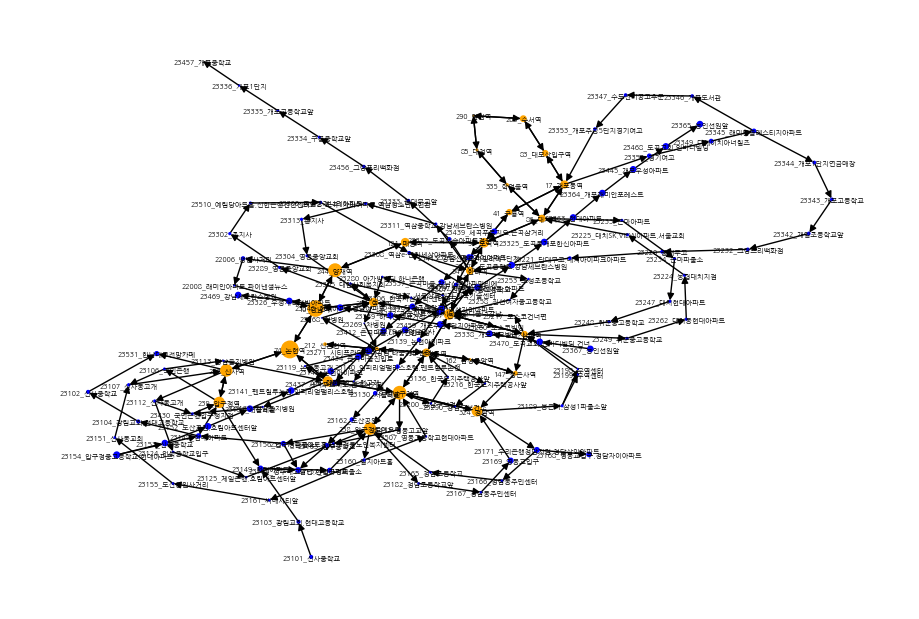

In [ ]:
plt.figure(figsize=(9,6))
pos = nx.kamada_kawai_layout(gugraph['강남구'])
nx.draw(gugraph['강남구'], pos, with_labels=True, font_family=font_prop.get_name(),
        font_size = 5, node_color=colors, node_size=node_sizes)
plt.show()

In [ ]:
seoulg.nodes(data=True)['1_4.19민주묘지역'].keys()

dict_keys(['ARS_ID', 'name', 'X', 'Y', 'type', '행정동', '구', 'dc', 'cc', 'bc'])

In [ ]:
nodes_df = pd.DataFrame([(node, *data.values()) for node, data in seoulg.nodes(data=True)],
                        columns=['node', 'ARS_ID', 'name', 'X', 'Y', 'type', 'dong', 'gu', 'dc', 'cc', 'bc', 'wdc'])

In [ ]:
nodes_df

,node,ARS_ID,name,X,Y,type,dong,gu,dc,cc,bc,wdc
0,1_4.19민주묘지역,1,4.19민주묘지역,37.649527,127.013689,subway,우이동,강북구,0.003067,0.036469,0.011233,0.205054
1,3_가락시장역,3,가락시장역,37.493092,127.118258,subway,가락동,송파구,0.002453,0.038464,0.003893,0.388440
2,4_가산디지털단지역,4,가산디지털단지역,37.480389,126.882644,subway,가산동,금천구,0.004600,0.050992,0.071278,0.837083
3,5_가양역,5,가양역,37.561429,126.854402,subway,등촌동,강서구,0.003067,0.049535,0.013122,0.963932
4,6_가오리역,6,가오리역,37.641634,127.016769,subway,수유동,강북구,0.002453,0.037623,0.017975,0.178756
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,23472_도곡중학교.강남세브란스병원,23472,도곡중학교.강남세브란스병원,37.493602,127.046722,bus,도곡동,강남구,0.000613,0.026460,0.007142,0.084885
2186,23507_영동고등학교현대아파트,23507,영동고등학교현대아파트,37.521355,127.039530,bus,논현동,강남구,0.000613,0.047150,0.000274,0.105870
2187,23510_예림당아트홀.신한은행전산센터,23510,예림당아트홀.신한은행전산센터,37.498223,127.044293,bus,역삼동,강남구,0.000613,0.043370,0.000828,0.055144
2188,23531_한남대교전망카페,23531,한남대교전망카페,37.524552,127.015683,bus,압구정동,강남구,0.000920,0.051721,0.003781,0.244943


In [ ]:
nodes_df.to_csv('서울대중교통그래프_노드데이터셋.csv', encoding='cp949', index=False)

In [ ]:
edges_df = pd.DataFrame([(source, target, data['weight']) for source, target, data in seoulg.edges(data=True)],
                        columns=['source', 'target', 'weight'])

In [ ]:
edges_df.to_csv('서울대중교통그래프_엣지데이터셋.csv', encoding='cp949', index=False)

#avg path length

avg path length

In [ ]:
nx.average_shortest_path_length(seoulg)

NetworkXError: ignored

In [ ]:
import networkx as nx
#나올 때도 있고 안 나올 때도 있음

# Check if the graph is strongly connected
if nx.is_strongly_connected(seoulg):
    avg_path_length = nx.average_shortest_path_length(seoulg)
    print(f"Average path length: {avg_path_length}")
else:
    # If not strongly connected, you can find the average path length for each connected component
    components = list(nx.weakly_connected_components(seoulg))
    avg_lengths = []

    for component in components:
        subgraph = seoulg.subgraph(component)
        avg_lengths.append(nx.average_shortest_path_length(subgraph))
        # Get the number of nodes and edges for each component
        num_nodes_component = nx.number_of_nodes(subgraph)
        num_edges_component = nx.number_of_edges(subgraph)
        print(f"Component Nodes: {num_nodes_component}, Component Edges: {num_edges_component}")

    avg_path_length = sum(avg_lengths) / len(avg_lengths)
    print(f"Average path length for disconnected graph: {avg_path_length}")

NetworkXError: ignored

In [ ]:
avg_lengths

[17.054064718652818, 0, 0, 0, 0, 0]

In [ ]:
giant = list(nx.weakly_connected_components(seoulg))[0]
giant = seoulg.subgraph(giant)
print('giant componenets는 전체 노드의', nx.number_of_nodes(giant)/nx.number_of_nodes(seoulg))
print('giant componenets는 전체 엣지의', nx.number_of_edges(giant)/nx.number_of_edges(seoulg))
print('giant components의 avg shortest path length:', nx.average_shortest_path_length(giant))

giant componenets는 전체 노드의 0.997716894977169
giant componenets는 전체 엣지의 1.0


NetworkXError: ignored

구별 avg path length

In [ ]:
gu_avgpathlen = []
for g in gu:
  print(f'<{g}의 avg shorthest path length>')
  subg = gugraph[g]
  giant = list(nx.weakly_connected_components(subg))[0]
  giant = subg.subgraph(giant)
  apl = nx.average_shortest_path_length(giant)
  gu_avgpathlen.append(apl)
  print('giant componenets는 전체 노드의', nx.number_of_nodes(giant)/nx.number_of_nodes(subg))
  print('giant componenets는 전체 엣지의', nx.number_of_edges(giant)/nx.number_of_edges(subg))
  print('giant components의 avg shortest path length:', apl)
  print()

In [ ]:
gu_order = []
gu_avgpathlen = []
gu_compsfor90 = []

for g in gu:
  print(f'<{g}의 avg shorthest path length>')
  subg = gugraph[g]
  components = list(nx.weakly_connected_components(subg))

  cnt = 0
  p = 0
  avg_lengths = []
  for comp in components:
    cnt += 1
    giant = subg.subgraph(comp)
    apl = nx.average_shortest_path_length(giant)
    avg_lengths.append(apl)
    p += nx.number_of_edges(giant)/nx.number_of_edges(subg)
    if p >= 0.9:
      break
  avg_path_length = sum(avg_lengths) / len(avg_lengths)

  print(f'components {cnt}개로 전체 edge의 90% 이상 포함')
  print('avg shortest path length:', avg_path_length)
  print()

  gu_order.append(g)
  gu_avgpathlen.append(avg_path_length)
  gu_compsfor90.append(cnt)

In [ ]:
guapl = pd.DataFrame({'구': gu_order,
                      '90%edge_comp개수': gu_compsfor90,
                      'avg_path_len': gu_avgpathlen})
guapl

In [ ]:
#guapl.to_csv('구별avgpathlength.csv', index=False, encoding='cp949')

#centrality

In [ ]:
sorted_nodes = sorted(gugraph['송파구'].nodes(data=True), key=lambda x: x[1]['dc'], reverse=True)
cnt = 0
for node, attributes in sorted_nodes:
  cnt += 1
  print(f"Node {node}: {' '.join(f'{key}={value}' for key, value in attributes.items())}")
  if cnt == 30 :
    break

Node 266_올림픽공원역: ARS_ID=266 name=올림픽공원역 X=37.5163245709914 Y=127.130963650207 type=subway 행정동=방이동 구=송파구 dc=0.0024532352039251764 cc=0.038339659218381526 bc=0.002864964139887586
Node 3_가락시장역: ARS_ID=3 name=가락시장역 X=37.493092048704 Y=127.118258210622 type=subway 행정동=가락동 구=송파구 dc=0.0024532352039251764 cc=0.038464493045794676 bc=0.0038934404688607295
Node 186_석촌역: ARS_ID=186 name=석촌역 X=37.5054105299706 Y=127.106990485844 type=subway 행정동=석촌동 구=송파구 dc=0.0024532352039251764 cc=0.04091246702510337 bc=0.004264665427336109
Node 293_잠실역: ARS_ID=293 name=잠실역 X=37.5133092702048 Y=127.100215181119 type=subway 행정동=신천동 구=송파구 dc=0.0024532352039251764 cc=0.04280019275419459 bc=0.004779899357137197
Node 306_종합운동장역: ARS_ID=306 name=종합운동장역 X=37.5111302556967 Y=127.07383586044 type=subway 행정동=잠실동 구=송파구 dc=0.0024532352039251764 cc=0.04505472224202479 bc=0.004343052382923575
Node 146_복정역: ARS_ID=146 name=복정역 X=37.4707382891863 Y=127.126701394602 type=subway 행정동=장지동 구=송파구 dc=0.0024532352039251764 cc=0.037633134

In [ ]:
sorted_nodes = sorted(gugraph['강동구'].nodes(data=True), key=lambda x: x[1]['dc'], reverse=True)
cnt = 0
for node, attributes in sorted_nodes:
  cnt += 1
  print(f"Node {node}: {' '.join(f'{key}={value}' for key, value in attributes.items())}")
  if cnt == 20 :
    break

Node 320_천호역: ARS_ID=320 name=천호역 X=37.5384968055586 Y=127.123919374783 type=subway 행정동=성내동 구=강동구 dc=0.0024532352039251764 cc=0.04346540388743308 bc=0.008001315504373078
Node 12_강동역: ARS_ID=12 name=강동역 X=37.5358747268317 Y=127.132378184615 type=subway 행정동=성내동 구=강동구 dc=0.0018399264029438822 cc=0.04150286985763579 bc=0.006053597848723322
Node 104_둔촌동역: ARS_ID=104 name=둔촌동역 X=37.527653243694 Y=127.136210118019 type=subway 행정동=둔촌동 구=강동구 dc=0.0012266176019625882 cc=0.039726669947271746 bc=0.0028328797744515497
Node 54_길동역: ARS_ID=54 name=길동역 X=37.5378120875517 Y=127.140007691428 type=subway 행정동=길동 구=강동구 dc=0.0012266176019625882 cc=0.03967641104588206 bc=0.0022056541051241386
Node 125_명일역: ARS_ID=125 name=명일역 X=37.5513942973681 Y=127.144039211129 type=subway 행정동=명일동 구=강동구 dc=0.0012266176019625882 cc=0.03646372394996929 bc=0.0011035795786982427
Node 25_고덕역: ARS_ID=25 name=고덕역 X=37.5550395608369 Y=127.154163861206 type=subway 행정동=명일동 구=강동구 dc=0.0012266176019625882 cc=0.03504349403675998 bc=0.0

In [ ]:
sorted_nodes = sorted(gugraph['종로구'].nodes(data=True), key=lambda x: x[1]['bc'], reverse=True)
cnt = 0
for node, attributes in sorted_nodes:
  cnt += 1
  print(f"Node {node}: {' '.join(f'{key}={value}' for key, value in attributes.items())}")
  if cnt == 5 :
    break

Node 99_동대문역: ARS_ID=99 name=동대문역 X=37.5716640012581 Y=127.010617962363 type=subway 행정동=창신동 구=종로구 dc=0.0036798528058877645 cc=0.05697466724800881 bc=0.12163168417719354
Node 304_종로3가역: ARS_ID=304 name=종로3가역 X=37.5704208439207 Y=126.992144196794 type=subway 행정동=종로3가 구=종로구 dc=0.0036798528058877645 cc=0.058794265722173576 bc=0.10969793681847904
Node 345_혜화역: ARS_ID=345 name=혜화역 X=37.5820258983338 Y=127.00192463086 type=subway 행정동=동숭동 구=종로구 dc=0.0027598896044158236 cc=0.0543712264553255 bc=0.09324268341887214
Node 305_종로5가역: ARS_ID=305 name=종로5가역 X=37.5709616924446 Y=127.001539476891 type=subway 행정동=종로5가 구=종로구 dc=0.0012266176019625882 cc=0.05752204603287111 bc=0.08176509624599186
Node 95_독립문역: ARS_ID=95 name=독립문역 X=37.5744680801684 Y=126.957911446269 type=subway 행정동=무악동 구=종로구 dc=0.004906470407850353 cc=0.05586789379932628 bc=0.08138233739598741


In [ ]:
sorted_nodes = sorted(gugraph['성동구'].nodes(data=True), key=lambda x: x[1]['bc'], reverse=True)
cnt = 0
for node, attributes in sorted_nodes:
  cnt += 1
  print(f"Node {node}: {' '.join(f'{key}={value}' for key, value in attributes.items())}")
  if cnt == 5 :
    break

Node 267_왕십리역: ARS_ID=267 name=왕십리역 X=37.5612611631671 Y=127.037078472459 type=subway 행정동=행당동 구=성동구 dc=0.004293161606869059 cc=0.05693034239990992 bc=0.11185396310700657
Node 264_옥수역: ARS_ID=264 name=옥수역 X=37.5415518643708 Y=127.017380201215 type=subway 행정동=옥수동 구=성동구 dc=0.0024532352039251764 cc=0.05747686573751869 bc=0.0652540349026825
Node 282_응봉역: ARS_ID=282 name=응봉역 X=37.549945423924 Y=127.034470070506 type=subway 행정동=응봉동 구=성동구 dc=0.0012266176019625882 cc=0.056590364843904256 bc=0.05976225227169388
Node 171_상왕십리역: ARS_ID=171 name=상왕십리역 X=37.5644348647729 Y=127.029270145908 type=subway 행정동=하왕십리동 구=성동구 dc=0.0024532352039251764 cc=0.05636515606601547 bc=0.03356778453857082
Node 213_신답역: ARS_ID=213 name=신답역 X=37.5698350860798 Y=127.04706653169 type=subway 행정동=용답동 구=성동구 dc=0.0021465808034345293 cc=0.05182143882707985 bc=0.03043082544112463


In [ ]:
sorted_nodes = sorted(gugraph['구로구'].nodes(data=True), key=lambda x: x[1]['bc'], reverse=True)
cnt = 0
for node, attributes in sorted_nodes:
  cnt += 1
  print(f"Node {node}: {' '.join(f'{key}={value}' for key, value in attributes.items())}")
  if cnt == 5 :
    break

Node 217_신도림역: ARS_ID=217 name=신도림역 X=37.5089048744726 Y=126.891307981962 type=subway 행정동=신도림동 구=구로구 dc=0.0036798528058877645 cc=0.055295635452194104 bc=0.18983175975042196
Node 40_구로역: ARS_ID=40 name=구로역 X=37.5033280243545 Y=126.882291119347 type=subway 행정동=구로동 구=구로구 dc=0.003986507206378412 cc=0.05305076048599282 bc=0.14367374337051184
Node 16_개봉역: ARS_ID=16 name=개봉역 X=37.4946344799821 Y=126.858693356963 type=subway 행정동=개봉동 구=구로구 dc=0.0036798528058877645 cc=0.04814053805919689 bc=0.0828406156721542
Node 45_구일역: ARS_ID=45 name=구일역 X=37.4962509036903 Y=126.869682064958 type=subway 행정동=구로동 구=구로구 dc=0.0018399264029438822 cc=0.05046926442035004 bc=0.08101693756270051
Node 262_오류동역: ARS_ID=262 name=오류동역 X=37.4943827932767 Y=126.844807477983 type=subway 행정동=오류동 구=구로구 dc=0.0024532352039251764 cc=0.04592097797053116 bc=0.06021382470244086
